# Homicide data in Mexico and the United States
## *A comparison of homicides by weapon and sex*

First, let us compare the homicide data by weapon type to observe any trends over the decade of 2007 - 2017:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
#First, let's create a timeline for Mexico's homicides from 2007-2017 by weapon type using a line chart, 
#one line for each type

with open('homicidios_armas_timeline.csv') as armas:
    # To get rid of the odd '\ufeff' as well as the typical '\n.' we will strip and replace to clean the values
    armas_data = [x.strip().replace('\ufeff','').split(",") for x in armas.readlines()]
    armas_headers = armas_data[0]


In [16]:
# The numbers are strings, so we need to convert them to numeric values, in this case integers

def convert_to_ints(values):
    return [int(v) for v in values]

In [17]:
armas_data = [convert_to_ints(row) for row in armas_data[1:]]

# Currently, we have more years than needed - we only want a decade. Let's get rid of the unnecessary years.

timeline = []
for year in armas_data:
    if year[0] >= 2007:
        timeline.append(year)

In [18]:
# Let's create a dictionary so we can pull the values we want for each line in our line chart

types = {}

for i in range(len(armas_headers)):
    types[armas_headers[i]] = [val[i] for val in timeline]


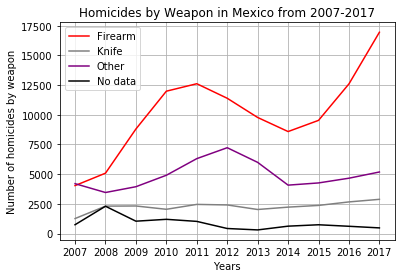

In [19]:
# Now we can plot!

x_vals = types['Year']
firearm_y_vals = types['Firearm']
knife_y_vals = types['Knife']
other_y_vals = types['Other']
nd_y_vals = types['No data']

plt.title('Homicides by Weapon in Mexico from 2007-2017')
plt.xlabel("Years")
plt.ylabel("Number of homicides by weapon")
# Showing all the years as labels is just a personal preference
plt.xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.plot(x_vals, firearm_y_vals, color='red', label='Firearm')
plt.plot(x_vals, knife_y_vals, color='gray', label='Knife')
plt.plot(x_vals, other_y_vals, color='purple', label='Other')
plt.plot(x_vals, nd_y_vals, color='black', label='No data')
plt.grid(True)
plt.legend()
plt.show()

### What does this graph show us?

Clearly, homicides in Mexico are mostly committed by firearm, which is not too surprising given the wider range of a firearm, and thus its higher effectiveness. Every weapon type other than *no data* has seen a rise, especially firearm homicides, which is no surprise either given the current issues of police corruption and resulting [security privatization](https://www.reuters.com/article/us-mexico-security/mexico-private-security-boom-adds-to-corruption-use-of-force-study-idUSKBN1H339B), as well as the prevalence of [gang/cartel activity](https://www.theguardian.com/world/2018/jul/23/mexico-crime-homicides-violence-up-report) throughout the country. 

However, the slight decline in *no data* records may indicate that data collection practices are becoming more precise and thus more robust, which is a great step towards measuring and counteracting Mexico's longstanding issue with violence and instability.

## Now, the United States

Let's recreate the same graph to observe the development of homicides by weapon in the United States.

In [20]:
# Here I quickly replicate most of what I have already done for the Mexican data

types_usa = {}
with open('homicide-by-weapon-decade-US.csv') as hom:
    hom_data = [x.strip().replace('\ufeff', '').split(',') for x in hom.readlines()]
    hom_headers = [x[0] for x in hom_data]
    hom_vals = [x[1:] for x in hom_data]
    hom_vals = [convert_to_ints(row) for row in hom_vals]
    
    for i in range(len(hom_headers)):
        types_usa[hom_headers[i]] = hom_vals[i]

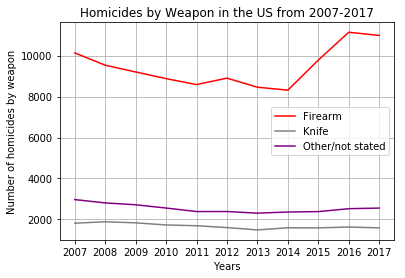

In [21]:
# Time to plot

x_vals = types_usa['Year']
firearm_y_vals = types_usa['Firearm']
knife_y_vals = types_usa['Knife']
other_y_vals = types_usa['Other/not stated']

plt.title('Homicides by Weapon in the US from 2007-2017')
plt.xlabel("Years")
plt.ylabel("Number of homicides by weapon")

plt.xticks([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
plt.plot(x_vals, firearm_y_vals, color='red', label='Firearm')
plt.plot(x_vals, knife_y_vals, color='gray', label='Knife')
plt.plot(x_vals, other_y_vals, color='purple', label='Other/not stated')
plt.grid(True)
plt.legend()
plt.show()

### What does this graph show us?

Clearly, firearms are once again the most used in a homicide, but the disparity here is much higher than in Mexico consistently throughout the decade. Mexico has seen a significant spike in homicides by firearm since 2015, yet the United States has recorded this disparity since before 2007, looking at the upward tick to the left. 

Important to note is that the United States does not have a separate category that records homicides for which weapon/method of homicide was missing. Thus, the data from Mexico and the US do not perfectly compare.

#### Nonetheless, keeping our sidenote in mind, let us compare the two countries directly in pie charts for 2007 and 2017.

In [22]:
# # MEX 2007 data to plot
# label_mex = armas_headers[1:-1]
# prop_mex = timeline[0][1:-1]
# colors = ['silver', 'red', 'orange', 'darkgray']
 
# # Plot
# plt.title('Mexico Homicides by Weapon in 2007')
# plt.pie(prop_mex, labels=label_mex, autopct='%.2f', colors=colors, shadow=True)
# plt.axis('equal')
# plt.show()

# # MEX 2017 data to plot
# prop_mex_b = timeline[-1][1:-1]

 
# # Plot
# plt.title('Mexico Homicides by Weapon in 2017')
# plt.pie(prop_mex_b, labels=label_mex, autopct='%.2f', colors=colors, shadow=True)
# plt.axis('equal')
# plt.show()




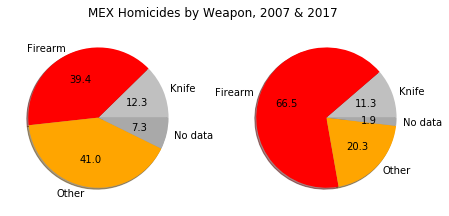

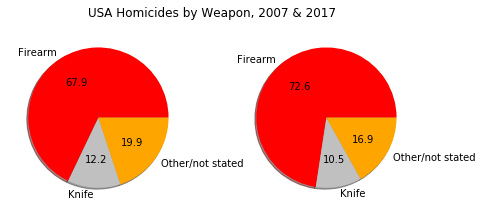

In [28]:
# MEX 2007 data to plot
label_mex = armas_headers[1:-1]

mex_2007 = timeline[0][1:-1]
mex_2017 = timeline[-1][1:-1]

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'aspect':'equal'})
colors = ['silver', 'red', 'orange', 'darkgray']

# plot each pie chart in a separate subplot
ax1.pie(mex_2007, labels=label_mex, autopct='%.1f', colors=colors, shadow=True)
ax2.pie(mex_2017, labels=label_mex, autopct='%.1f', colors=colors, shadow=True)
# Adjust so nothing overlaps or is awkwardly far away
fig.tight_layout()
fig.subplots_adjust(wspace = 0.3,top = 1.15)
# Give the two an appropriate title
fig.suptitle('MEX Homicides by Weapon, 2007 & 2017')

plt.show()

#USA 2007 data
label_usa = hom_headers[1:]
usa_2007 = [i[0] for i in hom_vals[1:]]
usa_2017 = [i[-1] for i in hom_vals[1:]]


# Same code with slight adjustments where appropriate
fig, (ax3, ax4) = plt.subplots(1, 2, subplot_kw={'aspect':'equal'})
colors = ['red', 'silver', 'orange', 'darkgray']

# plot each pie chart in a separate subplot
ax3.pie(usa_2007, labels=label_usa, autopct='%.1f', colors=colors, shadow=True)
ax4.pie(usa_2017, labels=label_usa, autopct='%.1f', colors=colors, shadow=True)
# Adjust so nothing overlaps or is awkwardly far away
fig.tight_layout()
fig.subplots_adjust(wspace = 0.3,top = 1.15)
# Give the two an appropriate title
fig.suptitle('USA Homicides by Weapon, 2007 & 2017')

plt.show()

### The takeaway when comparing the United States with Mexico
What is interesting here is that we can directly see that the prevalence of firearms in homicide cases is much higher in the US than Mexico, though firearm use has risen in both. The rise in Mexico is particularly severe, though the US still managed to record a higher percentage. In Mexico, around 70% of the firearms were purchased in the United States legally yet smuggled across the border into Mexico, as reported by the [US Bureau of Alcohol, Tobacco, Firearms and Explosives](https://www.latimes.com/world/la-fg-mexico-guns-20180524-story.html). This means there is a pervasive and growing problem of weapons trafficking and smuggling that is only further fueling the violence in Mexico, which we can observe in these visualizations.